## Objetivo

Usar el flujo típico de scikit-learn para entrenar un modelo de regresión lineal simple que explique la variable mpg a partir de una variable de tu elección. Evaluar el modelo y graficar los resultados.

## Link de los datos

https://github.com/IvTole/MachineLearning_InferenciaBayesiana_CUGDL/tree/main/data/mtcars

--

## Pasos
	
    1.	Cargar librerías y configurar el entorno
Importa pandas, numpy, matplotlib y de sklearn importa:
	•	train_test_split
	•	LinearRegression
	•	metrics

```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
```
	
    2.	Cargar los datos
Abre el archivo mtcars.csv, inspecciona las primeras filas y revisa la información de las columnas.
	
    3.	Elegir la variable explicativa
Selecciona una variable (ejemplo: wt, hp, disp, qsec, etc.) y defínela como X.
Define mpg como la variable objetivo y.

```python
df_cars
#X = df_cars["hp"].to_frame() ## tiene que ser una matriz / DataFrame
X = df_cars[["hp", "disp", "qsec"]]
y = df_cars["mpg"]
```
	
    4.	Entrenar el modelo
Usa LinearRegression() de scikit-learn para ajustar el modelo en los datos de entrenamiento.
	
    5.	Obtener coeficiente e intercepto
Interpreta el signo y el valor del coeficiente. ¿Aumentar la variable explicativa incrementa o disminuye el mpg?
	
    6.	Evaluar el modelo
Calcula métricas en train y test:
	•	R²
	•	RMSE
	
    7.	Graficar los resultados
    	•	Haz un gráfico de dispersión de mpg vs la variable elegida.
    	•	Dibuja la recta de regresión sobre el mismo gráfico.

In [1]:
# Importacion de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelo
from sklearn.linear_model import LinearRegression

# Division en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Métricas de evaluación
from sklearn.metrics import r2_score, mean_squared_error

\begin{equation}
\rm{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y} - y_i)^2
\end{equation}

In [3]:
## Cargar datos
df = pd.read_csv("../data/mtcars/mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [13]:
# Matriz de caracteristicas y variable objetivo
#X = df[['wt']]
X = df['wt'].to_frame()
y = df['mpg']

In [15]:
# Split de datos, entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [22]:
## Instanciar el modelo
model = LinearRegression()

In [24]:
## Entrenar el modelo (sobre datos de entrenamiento)
model.fit(X_train, y_train)

LinearRegression()

In [25]:
## Parámetros de ajuste
print('beta0: ', model.intercept_)
print('beta1: ', model.coef_)

beta0:  36.93731031351841
beta1:  [-5.3369414]


In [28]:
## Predicciones del modelo (sobre los datos de prueba)
y_pred = model.predict(X_test)
y_pred

array([22.15398263,  7.98974016, 16.41677063, 25.19603923, 20.1259449 ,
       18.5782319 , 17.88442951])

In [31]:
pd.DataFrame({
    'wt': X_test['wt'],
    'mpg': y_test,
    'y_pred': y_pred
})

,wt,mpg,y_pred
29,2.770,19.7,22.153983
15,5.424,10.4,7.989740
24,3.845,19.2,16.416771
17,2.200,32.4,25.196039
8,3.150,22.8,20.125945
9,3.440,19.2,18.578232
30,3.570,15.0,17.884430


In [38]:
### metricas
mse = mean_squared_error(y_test, y_pred)
print('mse: ', round(mse,2), 'mpg^2')
print('rmse: ', round(np.sqrt(mse),2), 'mpg')
r2 = r2_score(y_test, y_pred)
print('r2: ', round(r2,2))

mse:  12.48 mpg^2
rmse:  3.53 mpg
r2:  0.69


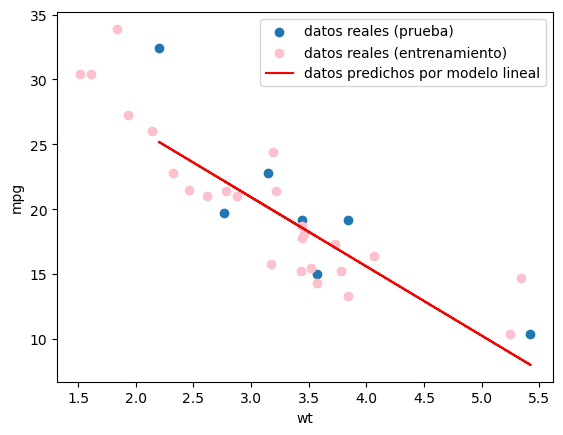

In [42]:
## Graficar

plt.scatter(X_test, y_test, label = 'datos reales (prueba)')
plt.scatter(X_train, y_train, color='pink', label = 'datos reales (entrenamiento)')
plt.plot(X_test, y_pred, color='red', label = 'datos predichos por modelo lineal')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.legend()
plt.show()